### Import Libraries

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import matplotlib as mpl
import pandas as pd
import seaborn as sns
import scipy.stats as stats

In [2]:
plt.rcParams.update(plt.rcParamsDefault)
plt.rcParams.update({
  "font.size": 16,
  "grid.alpha": 0.25})

### Pre-processing

In [8]:
file_path = "./data/stock_cdb_2021_2024.csv"
df_stock = pd.read_csv(file_path)
df_stock["Bulan"] = pd.to_datetime(df_stock["Bulan"], format="%b-%y")
df_stock["Bulan"] = df_stock["Bulan"].dt.strftime("%Y-%b")
df_stock


,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe
0,2021-Jan,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0
1,2021-Jan,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0
2,2021-Jan,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0
3,2021-Jan,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A
4,2021-Jan,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A
...,...,...,...,...,...,...,...,...
2632,2024-Aug,R4Z,1858,5200022541,KFB1E1087704,KFB119RK087757,MA0,MA0
2633,2024-Aug,R4Z,1858,5200022541,KFB1E1089792,KFB116RK089966,MA0,MA0
2634,2024-Aug,R4Z,1858,5200022541,KFB1E1090542,KFB118RK090522,MA0,MA0
2635,2024-Aug,R4Z,1858,5200022541,KFB2E1052137,KFB219RK052098,MB0,MB0


In [9]:
df_stock_initial = df_stock.copy()
df_stock_initial["initial Varian Plus"] = df_stock_initial["Kode Tipe AHM"].apply(lambda x: x[0])
df_stock_initial

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
0,2021-Jan,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0,L
1,2021-Jan,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0,L
2,2021-Jan,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0,L
3,2021-Jan,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A,L
4,2021-Jan,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A,L
...,...,...,...,...,...,...,...,...,...
2632,2024-Aug,R4Z,1858,5200022541,KFB1E1087704,KFB119RK087757,MA0,MA0,M
2633,2024-Aug,R4Z,1858,5200022541,KFB1E1089792,KFB116RK089966,MA0,MA0,M
2634,2024-Aug,R4Z,1858,5200022541,KFB1E1090542,KFB118RK090522,MA0,MA0,M
2635,2024-Aug,R4Z,1858,5200022541,KFB2E1052137,KFB219RK052098,MB0,MB0,M


In [10]:
df_stock_count = df_stock_initial[["initial Varian Plus"]].copy()
df_stock_count["count"] = 1.
df_stock_count = df_stock_count.groupby("initial Varian Plus").agg("count").reset_index()
df_stock_count

,initial Varian Plus,count
0,E,310
1,G,105
2,H,316
3,J,279
4,L,1478
5,M,149


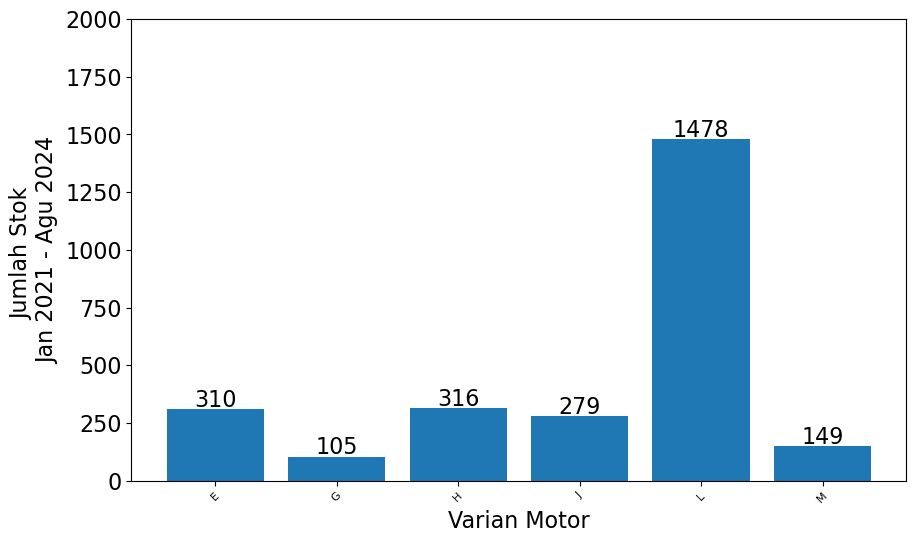

In [42]:
fig, ax = plt.subplots(figsize=(10, 6))

# because pandas includes right endpoint, we must subtract by one
x_data = df_stock_count["initial Varian Plus"]
y_data = df_stock_count["count"]
ax.bar(x_data, y_data)

ax.set_xticks(np.arange(len(x_data)))
ax.set_xticklabels(x_data, rotation=45, fontsize=8)
ax.set_xlabel("Varian Motor")
ax.set_ylabel("Jumlah Stok \nJan 2021 - Agu 2024")
ax.set_ylim([0, 2000])

for idx, val in enumerate(y_data):
  ax.text(x=idx, y=val+10, s=f"{val}", ha="center")

plt.subplots_adjust(hspace=0.3)
plt.show()

### Varian E

In [12]:
df_stock_E = df_stock_initial[df_stock_initial["initial Varian Plus"] == "E"].copy()
df_stock_E

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
15,2021-Jan,R4Z,1858,5200022541,KC92E1049384,KC9217LK051850,EXF,EXF,E
16,2021-Jan,R4Z,1858,5200022541,KC93E1013569,KC9315LK012477,EYE,EYE,E
17,2021-Jan,R4Z,1858,5200022541,KCA2E1084088,KCA210LK088546,EW2,EW2,E
89,2021-Feb,R4Z,576,5200022542,KC01E1067808,KC0118RK067819,EH2,EH2,E
90,2021-Feb,R4Z,576,5200022542,KC01E1067839,KC0110RK067829,EH2,EH2,E
...,...,...,...,...,...,...,...,...,...
2607,2024-Aug,R4Z,1858,5200022541,KD11E1517658,KD1115RK518417,ESE,ESE,E
2608,2024-Aug,R4Z,1858,5200022541,KD11E1517700,KD1111RK518463,ESE,ESE,E
2609,2024-Aug,R4Z,1858,5200022541,KD11E1519227,KD1113RK519937,ESE,ESE,E
2610,2024-Aug,R4Z,1858,5200022541,KD11E1519229,KD1113RK519940,ESE,ESE,E


In [13]:
# df_E_count["Bulan"] = pd.to_datetime(df_E_count["Bulan"])
# df_E_count = df_stock_E[["Bulan"]].copy()
# df_E_count["count"] = 1.
# df_E_count = df_E_count.groupby("Bulan").agg("count").reset_index()
# df_E_count

In [14]:
df_stock_E["Bulan"] = pd.to_datetime(df_stock_E["Bulan"])
df_E_count = df_stock_E[["Bulan"]].copy()
df_E_count = df_stock_E.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")
df_E_count = df_E_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()

df_E_count.columns = ["Bulan", "count"]
df_E_count

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\157276645.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_E["Bulan"] = pd.to_datetime(df_stock_E["Bulan"])


,Bulan,count
0,2021-01-01,3
1,2021-02-01,27
2,2021-03-01,2
3,2021-04-01,2
4,2021-05-01,1
5,2021-06-01,0
6,2021-07-01,0
7,2021-08-01,0
8,2021-09-01,0
9,2021-10-01,2


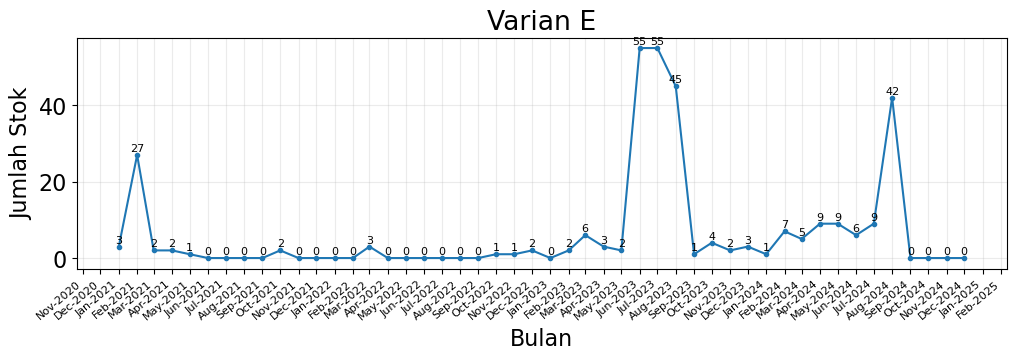

In [47]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_E_count["Bulan"], df_E_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%b-%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Varian E")

for idx, val in enumerate(df_E_count["count"]):
    ax.text(x=df_E_count["Bulan"].iloc[idx], y=val+1, s=f"{val}", ha="center", size=8)

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

plt.show()

### Varian G

In [16]:
df_stock_G = df_stock_initial[df_stock_initial["initial Varian Plus"] == "G"].copy()
df_stock_G

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
25,2021-Feb,R4Z,576,5200022542,JBK1E2006377,JBK129RK008796,GB4,GB4,G
26,2021-Feb,R4Z,576,5200022542,JBK1E2045918,JBK125RK048292,GB4,GB4,G
27,2021-Feb,R4Z,576,5200022542,JBN1E1241723,JBN112RK241671,GE5,GE5,G
28,2021-Feb,R4Z,576,5200022542,JBP1E2067533,JBP122RK067301,GF5,GF5,G
29,2021-Feb,R4Z,576,5200022542,JBP1E2068620,JBP122RK068528,GF5,GF5,G
...,...,...,...,...,...,...,...,...,...
2433,2024-Aug,R4Z,1858,5200022541,JBK3E1533475,JBK316RK535179,GD4,GD4,G
2434,2024-Aug,R4Z,1858,5200022541,JBN1E1237935,JBN11XRK237903,GE5,GE5,G
2435,2024-Aug,R4Z,1858,5200022541,JBP1E2050174,JBP124RK049933,GF5,GF5,G
2436,2024-Aug,R4Z,1858,5200022541,JBP1E2058759,JBP122RK058629,GF5,GF5,G


In [17]:
df_G_count = df_stock_G[["Bulan"]].copy()
df_G_count["count"] = 1.
df_G_count = df_G_count.groupby("Bulan").agg("count").reset_index()
df_G_count

,Bulan,count
0,2021-Apr,2
1,2021-Feb,5
2,2021-Jul,3
3,2021-Jun,2
4,2021-Mar,2
5,2021-May,2
6,2021-Sep,1
7,2022-Apr,12
8,2022-Aug,1
9,2022-Dec,1


In [18]:
df_G_count["Bulan"] = pd.to_datetime(df_G_count["Bulan"])

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\446224532.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_G_count["Bulan"] = pd.to_datetime(df_G_count["Bulan"])


In [19]:
df_stock_G["Bulan"] = pd.to_datetime(df_stock_G["Bulan"])
df_G_count = df_stock_G[["Bulan"]].copy()
df_G_count = df_stock_G.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")
df_G_count = df_G_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()

df_G_count.columns = ["Bulan", "count"]
df_G_count

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\399132981.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_G["Bulan"] = pd.to_datetime(df_stock_G["Bulan"])


,Bulan,count
0,2021-01-01,0
1,2021-02-01,5
2,2021-03-01,2
3,2021-04-01,2
4,2021-05-01,2
5,2021-06-01,2
6,2021-07-01,3
7,2021-08-01,0
8,2021-09-01,1
9,2021-10-01,0


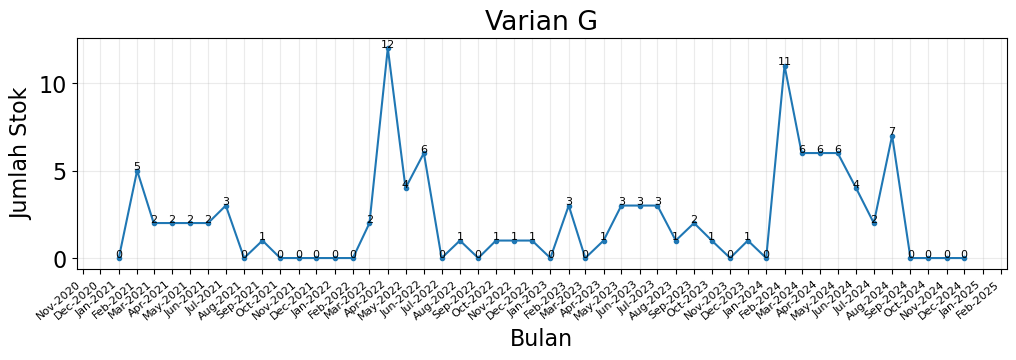

In [49]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_G_count["Bulan"], df_G_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%b-%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Varian G")

for idx, val in enumerate(df_G_count["count"]):
    ax.text(x=df_G_count["Bulan"].iloc[idx], y=val+ 0.05, s=f"{val}", ha="center", size=8)

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

plt.show()

### Varian H

In [21]:
df_stock_H = df_stock_initial[df_stock_initial["initial Varian Plus"] == "H"].copy()
df_stock_H

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
6,2021-Jan,R4Z,1858,5200022541,KB11E1244261,KB1116LK244786,HDN,HDN,H
7,2021-Jan,R4Z,1858,5200022541,KB22E1007332,KB2219LK007374,HJK,HJK,H
8,2021-Jan,R4Z,1858,5200022541,KB22E1008213,KB2214LK008237,HJK,HJK,H
9,2021-Jan,R4Z,1858,5200022541,KB22E1008751,KB2213LK008892,HJ9,HJ9,H
10,2021-Jan,R4Z,1858,5200022541,KB22E1008800,KB2214LK008948,HJ9,HJ9,H
...,...,...,...,...,...,...,...,...,...
2382,2024-Jul,R4Z,1858,5200022541,KB22E1046282,KB221XRK046371,HJ9,HJ9,H
2552,2024-Aug,R4Z,1858,5200022541,KB11E1351610,KB1117RK352083,HDP,HDP,H
2553,2024-Aug,R4Z,1858,5200022541,KB22E1044483,KB2215RK044639,HJ9,HJ9,H
2554,2024-Aug,R4Z,1858,5200022541,KB22E1046282,KB221XRK046371,HJ9,HJ9,H


In [22]:
df_H_count = df_stock_H[["Bulan"]].copy()
df_H_count["count"] = 1.
df_H_count = df_H_count.groupby("Bulan").agg("count").reset_index()
df_H_count

,Bulan,count
0,2021-Apr,32
1,2021-Aug,14
2,2021-Dec,9
3,2021-Feb,4
4,2021-Jan,16
5,2021-Jul,10
6,2021-Jun,18
7,2021-Mar,17
8,2021-May,20
9,2021-Nov,13


In [23]:
df_H_count["Bulan"] = pd.to_datetime(df_H_count["Bulan"])

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\1556614904.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_H_count["Bulan"] = pd.to_datetime(df_H_count["Bulan"])


In [24]:
df_stock_H["Bulan"] = pd.to_datetime(df_stock_H["Bulan"])
df_H_count = df_stock_H[["Bulan"]].copy()
df_H_count = df_stock_H.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")
df_H_count = df_H_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()

df_H_count.columns = ["Bulan", "count"]
df_H_count

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\1066618430.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_H["Bulan"] = pd.to_datetime(df_stock_H["Bulan"])


,Bulan,count
0,2021-01-01,16
1,2021-02-01,4
2,2021-03-01,17
3,2021-04-01,32
4,2021-05-01,20
5,2021-06-01,18
6,2021-07-01,10
7,2021-08-01,14
8,2021-09-01,17
9,2021-10-01,26


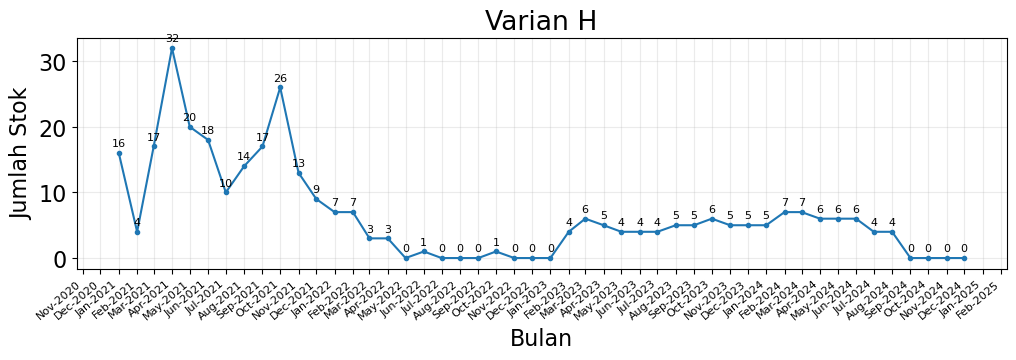

In [50]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_H_count["Bulan"], df_H_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%b-%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Varian H")

for idx, val in enumerate(df_H_count["count"]):
    ax.text(x=df_H_count["Bulan"].iloc[idx], y=val+1, s=f"{val}", ha="center", size=8)

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

plt.show()

### Varian J

In [26]:
df_stock_J = df_stock_initial[df_stock_initial["initial Varian Plus"] == "J"].copy()
df_stock_J

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
107,2021-Feb,R4Z,576,5200022542,KCC1E1013645,KCC119PK013704,JNT,JNT,J
108,2021-Feb,R4Z,576,5200022542,KCD1E1020221,KCD110RK020288,JR0,JR0,J
109,2021-Feb,R4Z,576,5200022542,KCD2E1046363,KCD213RK046494,JS0,JS0,J
110,2021-Feb,R4Z,576,5200022542,KCD2E1046663,KCD219RK046712,JS0,JS0,J
111,2021-Feb,R4Z,576,5200022542,KCE1E1018566,KCE112PK018495,JXA,JXA,J
...,...,...,...,...,...,...,...,...,...
2599,2024-Aug,R4Z,1858,5200022541,KCE1E1019133,KCE116PK019309,JX0,JX0,J
2600,2024-Aug,R4Z,1858,5200022541,KCE1E1023003,KCE114PK023102,JXA,JXA,J
2601,2024-Aug,R4Z,1858,5200022541,KCE1E1025413,KCE112RK025594,JX0,JX0,J
2602,2024-Aug,R4Z,1858,5200022541,KCE1E1025555,KCE112RK025787,JX0,JX0,J


In [27]:
df_J_count = df_stock_J[["Bulan"]].copy()
df_J_count["count"] = 1.
df_J_count = df_J_count.groupby("Bulan").agg("count").reset_index()
df_J_count

,Bulan,count
0,2021-Apr,1
1,2021-Aug,2
2,2021-Dec,3
3,2021-Feb,12
4,2021-Jul,2
5,2021-Mar,1
6,2021-May,1
7,2021-Nov,3
8,2021-Oct,3
9,2021-Sep,2


In [28]:
df_J_count["Bulan"] = pd.to_datetime(df_J_count["Bulan"])

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\524672053.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_J_count["Bulan"] = pd.to_datetime(df_J_count["Bulan"])


In [29]:
df_stock_J["Bulan"] = pd.to_datetime(df_stock_J["Bulan"])
df_J_count = df_stock_J[["Bulan"]].copy()
df_J_count = df_stock_J.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")
df_J_count = df_J_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()

df_J_count.columns = ["Bulan", "count"]
df_J_count

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\2103925471.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_J["Bulan"] = pd.to_datetime(df_stock_J["Bulan"])


,Bulan,count
0,2021-01-01,0
1,2021-02-01,12
2,2021-03-01,1
3,2021-04-01,1
4,2021-05-01,1
5,2021-06-01,0
6,2021-07-01,2
7,2021-08-01,2
8,2021-09-01,2
9,2021-10-01,3


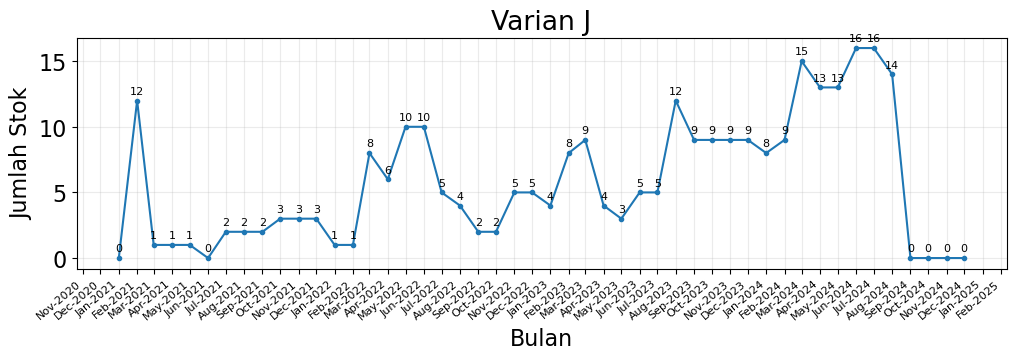

In [51]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_J_count["Bulan"], df_J_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%b-%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Varian J")

for idx, val in enumerate(df_J_count["count"]):
    ax.text(x=df_J_count["Bulan"].iloc[idx], y=val+0.5, s=f"{val}", ha="center", size=8)

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

plt.show()

### Varian L

In [31]:
df_stock_L = df_stock_initial[df_stock_initial["initial Varian Plus"] == "L"].copy()
df_stock_L

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
0,2021-Jan,R4Z,1858,5200022541,JM61E1126463,JM6112LK138354,LD0,LD0,L
1,2021-Jan,R4Z,1858,5200022541,JM61E1128750,JM6110LK129071,LD0,LD0,L
2,2021-Jan,R4Z,1858,5200022541,JM61E1129395,JM6112LK129394,LD0,LD0,L
3,2021-Jan,R4Z,1858,5200022541,JM91E1288702,JM9114LK290539,LK0,LK0A,L
4,2021-Jan,R4Z,1858,5200022541,JM91E1295308,JM9110LK294474,LK0,LK0A,L
...,...,...,...,...,...,...,...,...,...
2625,2024-Aug,R4Z,1858,5200022541,KFA1E1203856,KFA115RK204079,LW1,LW1A,L
2626,2024-Aug,R4Z,1858,5200022541,KFA1E1247727,KFA115RK247921,LW1,LW1A,L
2627,2024-Aug,R4Z,1858,5200022541,KFA1E1249969,KFA110RK249849,LW1,LW1A,L
2628,2024-Aug,R4Z,1858,5200022541,KFA1E1253732,KFA111RK255210,LW1,LW1A,L


In [32]:
df_L_count = df_stock_L[["Bulan"]].copy()
df_L_count["count"] = 1.
df_L_count = df_L_count.groupby("Bulan").agg("count").reset_index()
df_L_count

,Bulan,count
0,2021-Apr,41
1,2021-Aug,31
2,2021-Dec,13
3,2021-Feb,38
4,2021-Jan,6
5,2021-Jul,27
6,2021-Jun,46
7,2021-Mar,23
8,2021-May,44
9,2021-Nov,27


In [33]:
df_L_count["Bulan"] = pd.to_datetime(df_L_count["Bulan"])

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\1200219195.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_L_count["Bulan"] = pd.to_datetime(df_L_count["Bulan"])


In [34]:
df_stock_L["Bulan"] = pd.to_datetime(df_stock_L["Bulan"])
df_L_count = df_stock_L[["Bulan"]].copy()
df_L_count = df_stock_L.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")
df_L_count = df_L_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()

df_L_count.columns = ["Bulan", "count"]
df_L_count

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\385962653.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_L["Bulan"] = pd.to_datetime(df_stock_L["Bulan"])


,Bulan,count
0,2021-01-01,6
1,2021-02-01,38
2,2021-03-01,23
3,2021-04-01,41
4,2021-05-01,44
5,2021-06-01,46
6,2021-07-01,27
7,2021-08-01,31
8,2021-09-01,32
9,2021-10-01,36


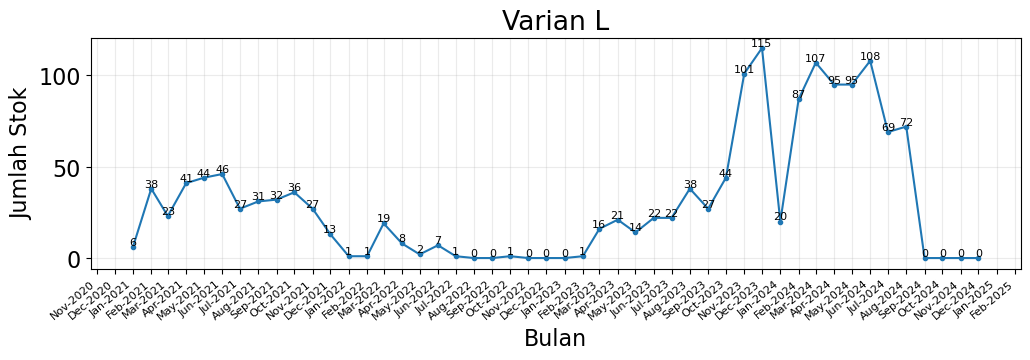

In [52]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_L_count["Bulan"], df_L_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%b-%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Varian L")

for idx, val in enumerate(df_L_count["count"]):
    ax.text(x=df_L_count["Bulan"].iloc[idx], y=val+1, s=f"{val}", ha="center", size=8)

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

plt.show()

### Varian M

In [36]:
df_stock_M = df_stock_initial[df_stock_initial["initial Varian Plus"] == "M"].copy()
df_stock_M

,Bulan,Kode MD,Kode Dealer AHM,Kode Dealer SAP,No. Mesin,No. Rangka,Kode Tipe AHM,Kode Tipe,initial Varian Plus
50,2021-Feb,R4Z,576,5200022542,JMC1E1479876,JMC111RK480787,MC1,MC1A,M
51,2021-Feb,R4Z,576,5200022542,JMC1E1481095,JMC116RK481384,MC1,MC1A,M
52,2021-Feb,R4Z,576,5200022542,JMC1E1481247,JMC113RK482198,MC1,MC1A,M
53,2021-Feb,R4Z,576,5200022542,JMD1E1692068,JMD118RK692463,MD1,MD1A,M
54,2021-Feb,R4Z,576,5200022542,JMD1E1697310,JMD112RK697710,MD1,MD1A,M
...,...,...,...,...,...,...,...,...,...
2632,2024-Aug,R4Z,1858,5200022541,KFB1E1087704,KFB119RK087757,MA0,MA0,M
2633,2024-Aug,R4Z,1858,5200022541,KFB1E1089792,KFB116RK089966,MA0,MA0,M
2634,2024-Aug,R4Z,1858,5200022541,KFB1E1090542,KFB118RK090522,MA0,MA0,M
2635,2024-Aug,R4Z,1858,5200022541,KFB2E1052137,KFB219RK052098,MB0,MB0,M


In [37]:
df_M_count = df_stock_M[["Bulan"]].copy()
df_M_count["count"] = 1.
df_M_count = df_M_count.groupby("Bulan").agg("count").reset_index()
df_M_count

,Bulan,count
0,2021-Feb,42
1,2022-Dec,1
2,2023-Aug,1
3,2023-Dec,1
4,2023-Mar,1
5,2023-Nov,2
6,2023-Oct,1
7,2024-Apr,5
8,2024-Aug,68
9,2024-Feb,3


In [38]:
df_M_count["Bulan"] = pd.to_datetime(df_M_count["Bulan"])

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\1979924071.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_M_count["Bulan"] = pd.to_datetime(df_M_count["Bulan"])


In [39]:
df_stock_M["Bulan"] = pd.to_datetime(df_stock_M["Bulan"])
df_M_count = df_stock_M[["Bulan"]].copy()
df_M_count = df_stock_M.groupby("Bulan").size().reset_index(name="count")

all_months = pd.date_range(start="2021-01-01", end="2024-12-01", freq="MS")
df_M_count = df_M_count.set_index("Bulan").reindex(all_months, fill_value=0).reset_index()

df_M_count.columns = ["Bulan", "count"]
df_M_count

C:\Users\TEMP\AppData\Local\Temp\ipykernel_11408\2411701318.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_stock_M["Bulan"] = pd.to_datetime(df_stock_M["Bulan"])


,Bulan,count
0,2021-01-01,0
1,2021-02-01,42
2,2021-03-01,0
3,2021-04-01,0
4,2021-05-01,0
5,2021-06-01,0
6,2021-07-01,0
7,2021-08-01,0
8,2021-09-01,0
9,2021-10-01,0


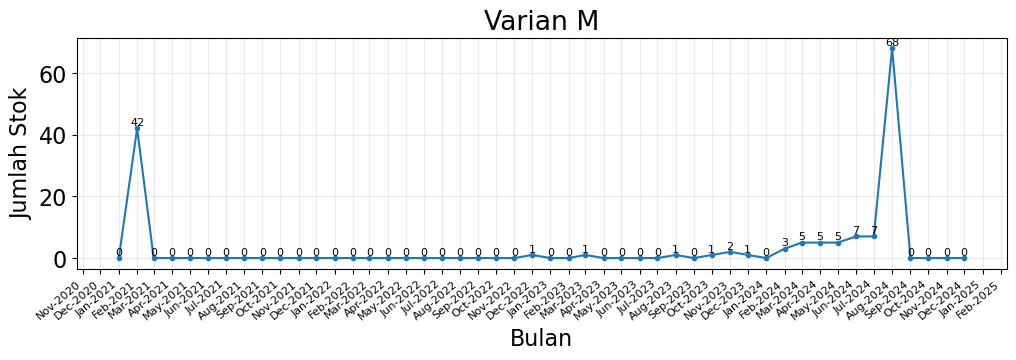

In [53]:
fig, ax = plt.subplots(figsize=(12, 3))

ax.plot(df_M_count["Bulan"], df_M_count["count"], linestyle="-",
        marker=".")

formatter = mdates.DateFormatter("%b-%Y")
# locator = mdates.YearLocator(base=2)
# locator = mdates.MonthLocator(bymonthday=1, bymonth=range(1, 13, 1))
locator = mdates.MonthLocator()
ax.xaxis.set_major_formatter(formatter)
ax.xaxis.set_major_locator(locator)

ax.grid("on")
ax.set_xlabel("Bulan")
ax.set_ylabel("Jumlah Stok")
ax.set_title("Varian M")

for idx, val in enumerate(df_M_count["count"]):
    ax.text(x=df_M_count["Bulan"].iloc[idx], y=val+1, s=f"{val}", ha="center", size=8)

for label in ax.get_xticklabels():
    label.set_rotation(40)
    label.set_fontsize(8)
    label.set_horizontalalignment('right')

plt.show()

### Agregrasi Jumlah Pembeli

In [41]:
df_stock_count

,initial Varian Plus,count
0,E,310
1,G,105
2,H,316
3,J,279
4,L,1478
5,M,149
